# Descriptive & Distribution Analysis

- Understanding overall customer cost behavior.

- What is the average insurance charge?

- How much do charges vary across customers?

- Is the distribution of charges skewed?

- Are there extreme high-cost customers?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data\insurance.csv")
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
C:\Users\akhia\AppData\Local\Temp\ipykernel_18908\2459740158.py:5: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv("data\insurance.csv")


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df[['age', 'bmi','children','charges']].var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [6]:
df[['age', 'bmi','children','charges']].skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### Distribution of charges,bmi,age

**charges**

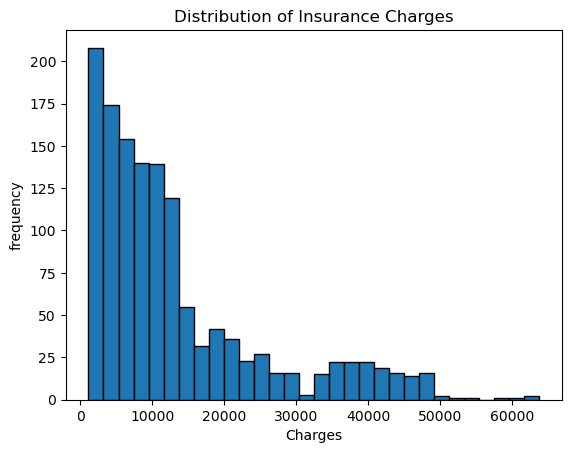

In [8]:
plt.hist(df['charges'],bins=30,edgecolor ="black")
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("frequency")
plt.show()

**BMI**

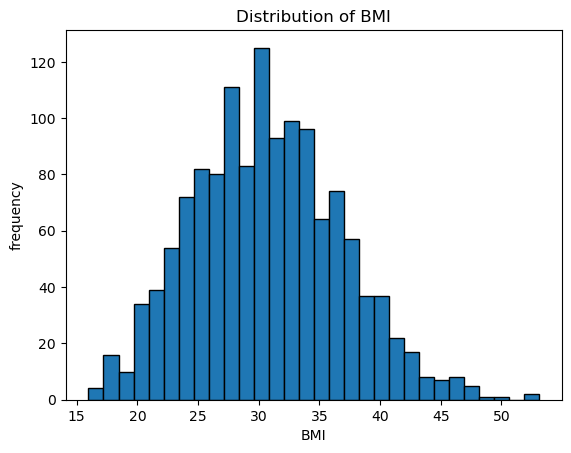

In [9]:
plt.hist(df['bmi'],bins=30,edgecolor='black')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("frequency")
plt.show()

**Age**

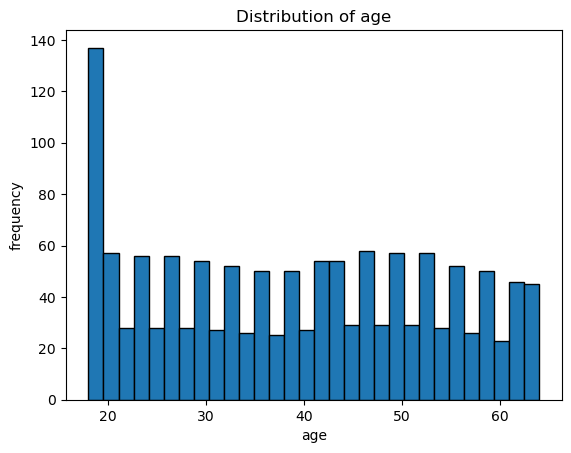

In [10]:
plt.hist(df['age'],bins=30,edgecolor='black')
plt.title("Distribution of age")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

### Identify High-Cost Customers

In [11]:
threshold = df['charges'].quantile(0.9)
threshold

np.float64(34831.7197)

In [15]:
high_cost = df[df['charges'] >= threshold]
len(high_cost)

134

### Summary of High-Cost Group

In [ ]:
high_cost[['age', 'bmi','children','charges']].describe()



smoker
yes    97.761194
no      2.238806
Name: proportion, dtype: float64

In [25]:
high_cost['smoker'].value_counts(normalize=True)*100

smoker
yes    97.761194
no      2.238806
Name: proportion, dtype: float64

In [23]:
high_cost['sex'].value_counts(normalize=True)*100

sex
male      62.686567
female    37.313433
Name: proportion, dtype: float64

# REPORT
The distribution of insurance charges is heavily right-skewed, indicating a small group of very high-cost customers. The top 10% of customers pay more than 34,831, and among them, nearly 98% are smokers. This suggests smoking is the dominant risk factor for high insurance cost, while BMI and gender play secondary roles.